In [1]:
%matplotlib inline

import pylab
import scipy
from astropy.io import fits
import scipy.fftpack as pf
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt #plot library
def init_plotting():
    plt.rcParams['figure.figsize'] = (14.0,8.0)
    plt.rcParams['font.size'] = 10
    #plt.rcParams['font.family'] = 'Times New Roman'
    plt.rcParams['axes.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['axes.titlesize'] = 2*plt.rcParams['font.size']
    plt.rcParams['legend.fontsize'] = 0.65*plt.rcParams['font.size']
    plt.rcParams['xtick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['ytick.labelsize'] = plt.rcParams['font.size']
    plt.rcParams['xtick.major.size'] = 3
    plt.rcParams['xtick.minor.size'] = 3
    plt.rcParams['xtick.major.width'] = 1
    plt.rcParams['xtick.minor.width'] = 1
    plt.rcParams['ytick.major.size'] = 3
    plt.rcParams['ytick.minor.size'] = 3
    plt.rcParams['ytick.major.width'] = 1
    plt.rcParams['ytick.minor.width'] = 1
    plt.rcParams['legend.frameon'] = True
    plt.rcParams['legend.loc'] = 'best'
    plt.rcParams['axes.linewidth'] = 1

init_plotting()


/home/brambila/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


(<matplotlib.text.Text at 0xa8a520ec>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

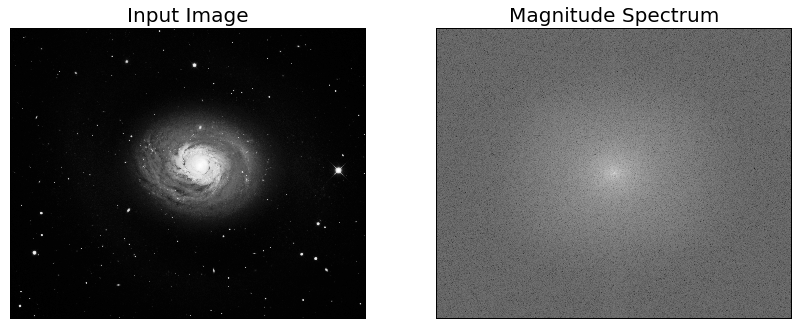

In [4]:
caminho  = '/home/brambila/UFRJ/TDA/projeto_2_tda/n4736_optical.fits'
im = fits.getdata(caminho)
im = scipy.array(im,dtype='Float64')

im_hat = pf.fft2(im)
im_hat_shift = np.fft.fftshift(im_hat)

magnitude_spectrum = 20*np.log(np.abs(im_hat_shift))
plt.subplot(121),plt.imshow(im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])


In [5]:
rows, cols = im.shape
rowi,rowf = int((rows/2) - 30) , int((rows/2) + 30)
coli,colf = int((cols/2) - 30) , int((cols/2) + 30)
#im_hat_shift[0:rowi, 0:coli] = 0
#im_hat_shift[rowf:, colf:] = 0
im_hat_shift[rowi:rowf, coli:colf] = 0
im_hat_ishift = np.fft.ifftshift(im_hat_shift)
img_back = np.fft.ifft2(im_hat_ishift)
img_back = np.abs(img_back)



(<matplotlib.text.Text at 0xa7f5332c>,
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

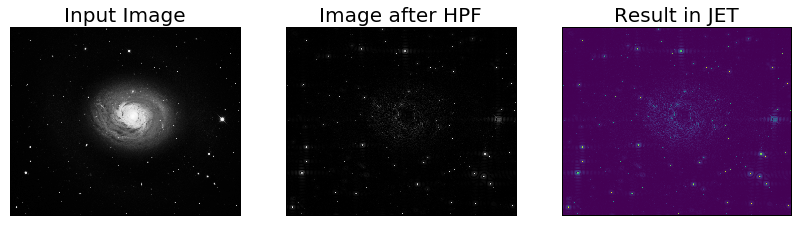

In [6]:
plt.subplot(131),plt.imshow(im, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

